# Machine Learning Animes Analysis Project

### Author: Wuyang Dai, Zhucheng Pan, Yiran Shen, Ruixin Zhang

Original Dataset Source: SAJID. (2023). Anime Dataset 2023. Kaggle. https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset?resource=download&select=anime-dataset-2023.csv


Modified Dataset: https://raw.githubusercontent.com/Threegoldsqwq/Machine_Learning_Animes_Analysis/main/anime-dataset-2023.csv

# Anime Dataset 2023 Description

**Attributes for Anime Dataset 2023:**

1. anime_id: Unique ID for each anime.

2. Name: The name of the anime in its original language.

3. English name: The English name of the anime.

4. Other name: Native name or title of the anime(can be in Japanese, Chinese or Korean).

5. Score: The score or rating given to the anime.

6. Genres: The genres of the anime, separated by commas.

7. Synopsis: A brief description or summary of the anime's plot.

8. Type: The type of the anime (e.g., TV series, movie, OVA, etc.).

9. Episodes: The number of episodes in the anime.

10. Aired: The dates when the anime was aired.

11. Premiered: The season and year when the anime premiered.

12. Status: The status of the anime (e.g., Finished Airing, Currently Airing, etc.).

13. Producers: The production companies or producers of the anime.

14. Licensors: The licensors of the anime (e.g., streaming platforms).

15. Studios: The animation studios that worked on the anime.

16. Source: The source material of the anime (e.g., manga, light novel, original).

17. Duration: The duration of each episode.

18. Rating: The age rating of the anime.

19. Rank: The rank of the anime based on popularity or other criteria.

20. Popularity: The popularity rank of the anime.

21. Favorites: The number of times the anime was marked as a favorite by users.

22. Scored By: The number of users who scored the anime.

23. Members: The number of members who have added the anime to their list on the platform.

24. Image URL: The URL of the anime's image or poster.

**Missing values:**
- English name: 14577
- Other name:128
- Score: 9213
- Genres: 4929
- Type: 74
- Episodes: 611
- Premiered: 19399
- Producers: 13350
- Licensors: 20170
- Studios: 10526
- Source:3689
- Duration: 663
- Rating: 669
- Rank: 4612
- Scored By: 9213


# 1- Look at the big picture

### Frame the problem
1. Supervised learning – training examples are labeled.
2. A classification task – predict a categorical data (genre of anime).
3. Batch learning 
   - Small data set (after clean up)
   - No continuous flow of data coming into the system
   - No need to adjust to changing data rapidly

### Look at the big picture
Task: Using anime data to predict popular anime genres in the future.

The result will help anime producers to decide which kind of anime should they make or which novel/manga should be animated

In [1]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2- Load the data

In [2]:
# Load the dataset from github
url = "https://raw.githubusercontent.com/Threegoldsqwq/Machine_Learning_Animes_Analysis/main/anime-dataset-2023.csv"
animes = pd.read_csv(url, sep=',')

# create a backup copy of the dataset
animes_backup = animes

### 2.1 Take a quick look at the data structure

We will first replace "UNKNOWN" variables to NaN and drop the "anime_id" column to make our life easier

(//delete later, for convenient)
https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html

https://sentry.io/answers/change-a-column-type-in-a-dataframe-in-python-pandas/

In [5]:
# Replace "UNKNOWN" labels to NaN
animes = animes.replace('UNKNOWN', np.nan)
#drop the id column
animes.drop(labels=['anime_id'], axis=1, inplace=True)
# animes.isna().sum()

Lets take a look at the whole dataset, we can see that there is 24905 rows and 24 columns

In [6]:
animes

,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",NaN,...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,Wu Nao Monu,NaN,无脑魔女,NaN,"Comedy, Fantasy, Slice of Life",No description available for this anime.,ONA,15.0,"Jul 4, 2023 to ?",NaN,...,NaN,Web manga,Unknown,PG-13 - Teens 13 or older,NaN,24723,0,NaN,0,https://cdn.myanimelist.net/images/anime/1386/...
24901,Bu Xing Si: Yuan Qi,Blader Soul,捕星司·源起,NaN,"Action, Adventure, Fantasy",No description available for this anime.,ONA,18.0,"Jul 27, 2023 to ?",NaN,...,NaN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,NaN,0,https://cdn.myanimelist.net/images/anime/1383/...
24902,Di Yi Xulie,The First Order,第一序列,NaN,"Action, Adventure, Fantasy, Sci-Fi",No description available for this anime.,ONA,16.0,"Jul 19, 2023 to ?",NaN,...,NaN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,NaN,0,https://cdn.myanimelist.net/images/anime/1130/...
24903,Bokura no Saishuu Sensou,NaN,僕らの最終戦争,NaN,NaN,A music video for the song Bokura no Saishuu S...,Music,1.0,"Apr 23, 2022",NaN,...,NaN,Original,3 min,PG-13 - Teens 13 or older,0.0,0,0,NaN,0,https://cdn.myanimelist.net/images/anime/1931/...


### Use head() to look at the first 5 rows.

In [24]:
animes.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


### Use describe() method to see a summary of the numerical attributes.

Since some numerical attributes are declared as "object", we have to change them to numbers in order to visualize them.

In [18]:
#Change 'Score', 'Episodes', 'Rank' and 'Scored By' categories to numerical value

animes[['Score', 'Episodes', 'Rank', 'Scored By']] = animes[['Score', 'Episodes', 'Rank', 'Scored By']].apply(pd.to_numeric)


**Please Note:** The anime_id column will be __removed__ later

From describe(), we can see that 75% of animes' score is below 7.06, which can be considered as medium level of quailty.

Also, many animes have 13 episodes, which means they will mostly finish airing in one season (in anime industry, one season is 3 month)

In [19]:
animes.describe()

,anime_id,Score,Episodes,Rank,Popularity,Favorites,Scored By,Members
count,24905.000000,15692.000000,24294.000000,20293.000000,24905.000000,24905.000000,1.569200e+04,2.490500e+04
mean,29776.709014,6.380890,14.913518,9960.770167,12265.388356,432.595222,2.997438e+04,3.710496e+04
std,17976.076290,0.928696,48.581251,5856.990951,7187.428393,4353.181647,1.169348e+05,1.568252e+05
min,1.000000,1.850000,1.000000,0.000000,0.000000,0.000000,1.000000e+02,0.000000e+00
25%,10507.000000,5.730000,1.000000,4885.000000,6040.000000,0.000000,3.840000e+02,2.090000e+02
50%,34628.000000,6.390000,2.000000,9958.000000,12265.000000,1.000000,1.760000e+03,1.056000e+03
75%,45240.000000,7.060000,13.000000,15032.000000,18491.000000,18.000000,1.085550e+04,9.326000e+03
max,55735.000000,9.100000,3057.000000,20104.000000,24723.000000,217606.000000,2.660903e+06,3.744541e+06


### Use info() to get a quick description of the data, the total number of rows, each attribute’s type, and the number of non-null values.

say something here

In [20]:
animes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      24905 non-null  int64  
 1   Name          24905 non-null  object 
 2   English name  10328 non-null  object 
 3   Other name    24777 non-null  object 
 4   Score         15692 non-null  float64
 5   Genres        19976 non-null  object 
 6   Synopsis      24905 non-null  object 
 7   Type          24831 non-null  object 
 8   Episodes      24294 non-null  float64
 9   Aired         24905 non-null  object 
 10  Premiered     5506 non-null   object 
 11  Status        24905 non-null  object 
 12  Producers     11555 non-null  object 
 13  Licensors     4735 non-null   object 
 14  Studios       14379 non-null  object 
 15  Source        24905 non-null  object 
 16  Duration      24905 non-null  object 
 17  Rating        24236 non-null  object 
 18  Rank          20293 non-nu

#### Use value_counts to show what categories exist and how many rows belong to each category

say something here

In [23]:
animes["Type"].value_counts(False, True, False, None, False)

Type
TV         7597
Movie      4381
OVA        4076
ONA        3533
Music      2686
Special    2558
NaN          74
Name: count, dtype: int64

## 2.2 Create a Test Set

Typically, you want to create the test set here, then explore and visualise the training data only to gain insights.
You will also typically prepare the data preprcosssing pipeline using training data only, and then apply the preprocessing on the test dataset.
However, in this demo, we will do the data cleaning and preprocessing on the whole dataset, then split into training and testing datasets right before training the model.


# 3. Explore and visualize the data to gain insights.


### 3.1 Plot a histogram of the data using hist()

The towers or bars of a histogram are called bins. The height of each bin shows how many values from that data fall into that range. 

Width of each bin is = (max value of data – min value of data) / total number of bins
    - age bin width = (22-15)/20 = 0.35

The default value of the number of bins to be created in a histogram is 10. However, we can change the size of bins using the parameter bins

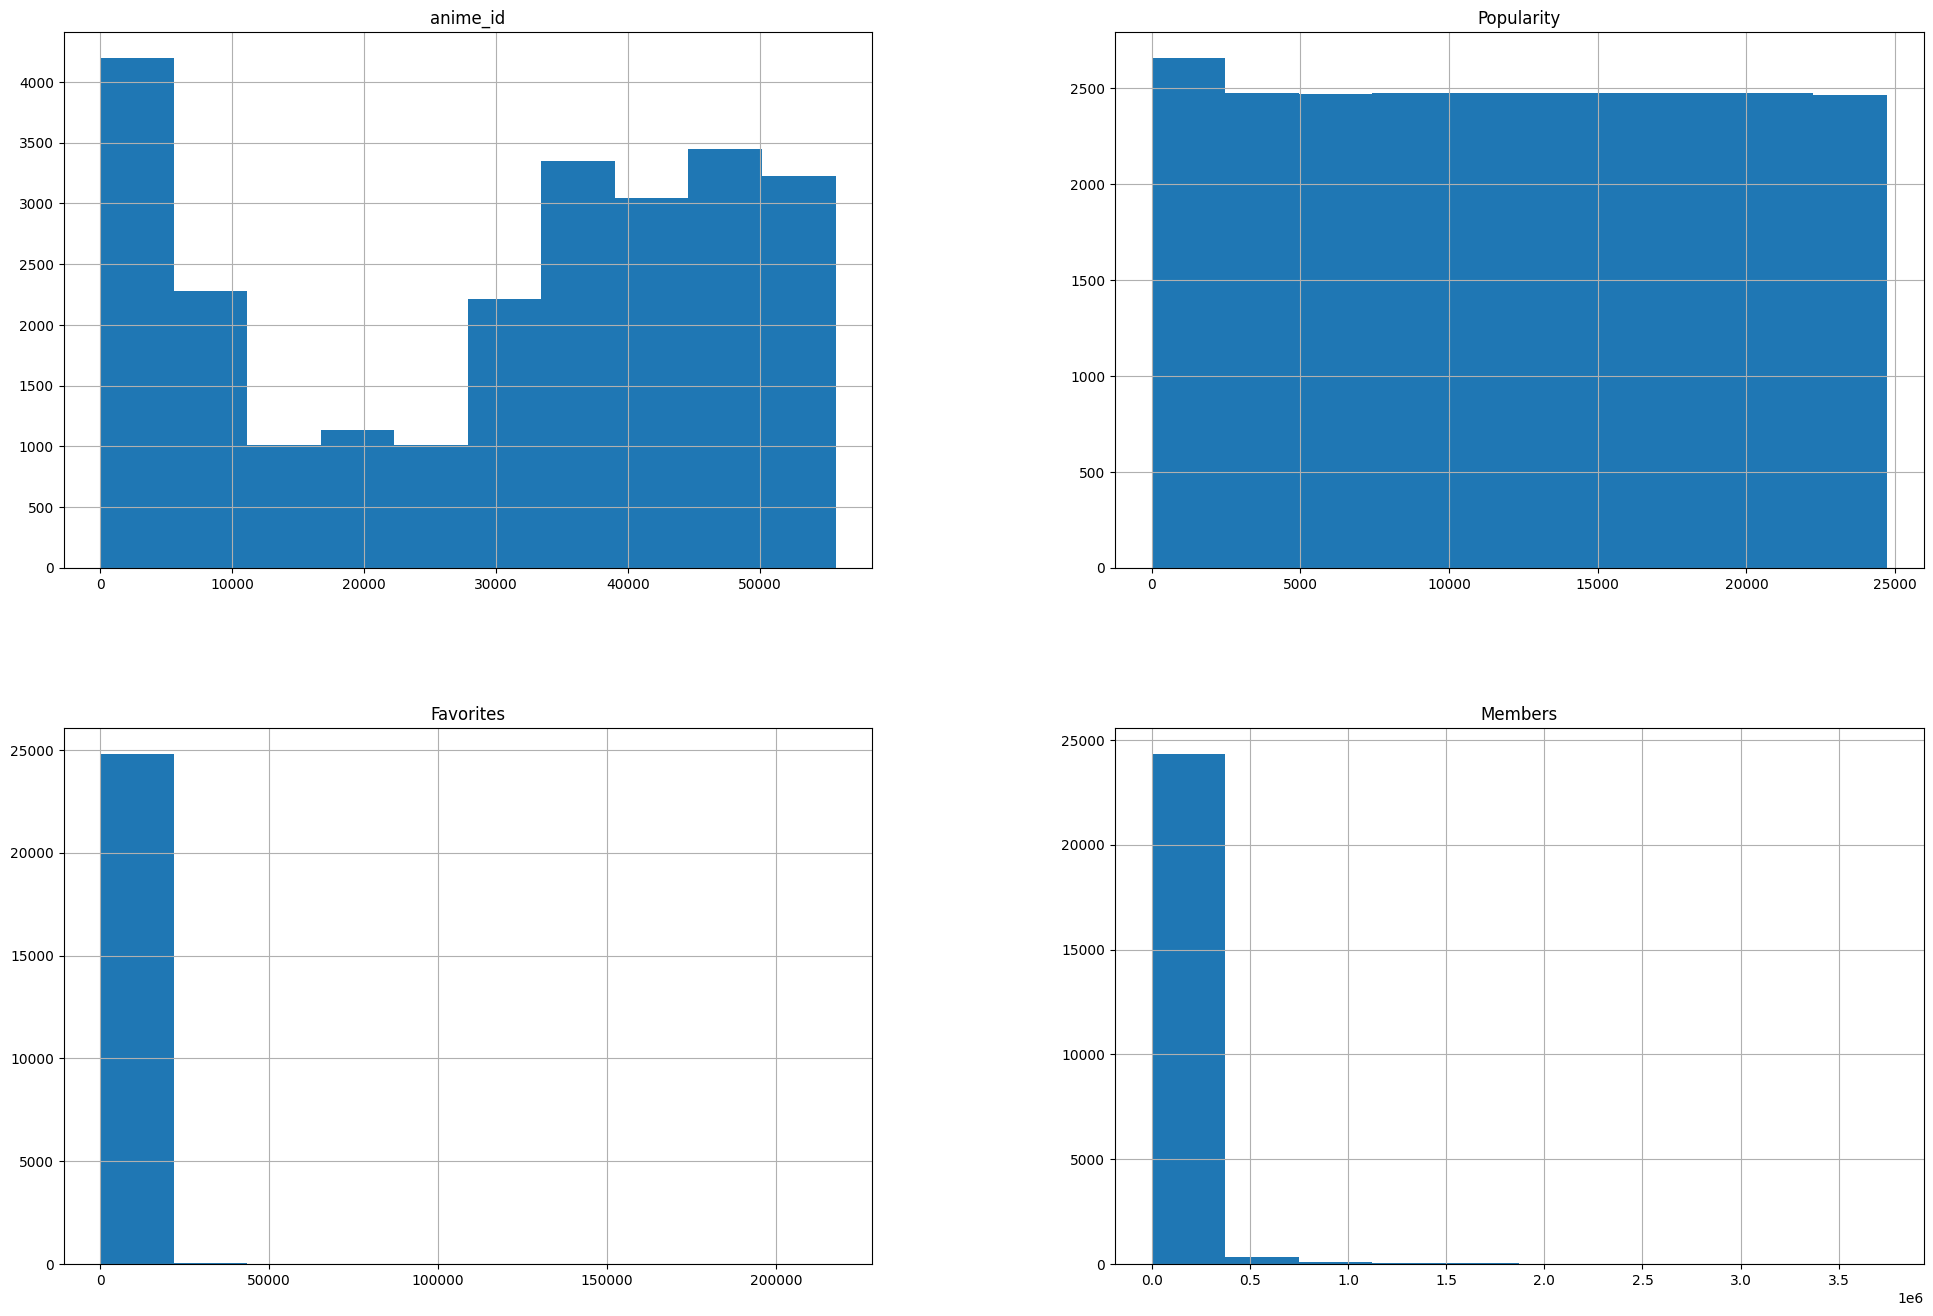

In [37]:
animes.hist(figsize=(24, 16))
plt.show()

Try changing the number of bins

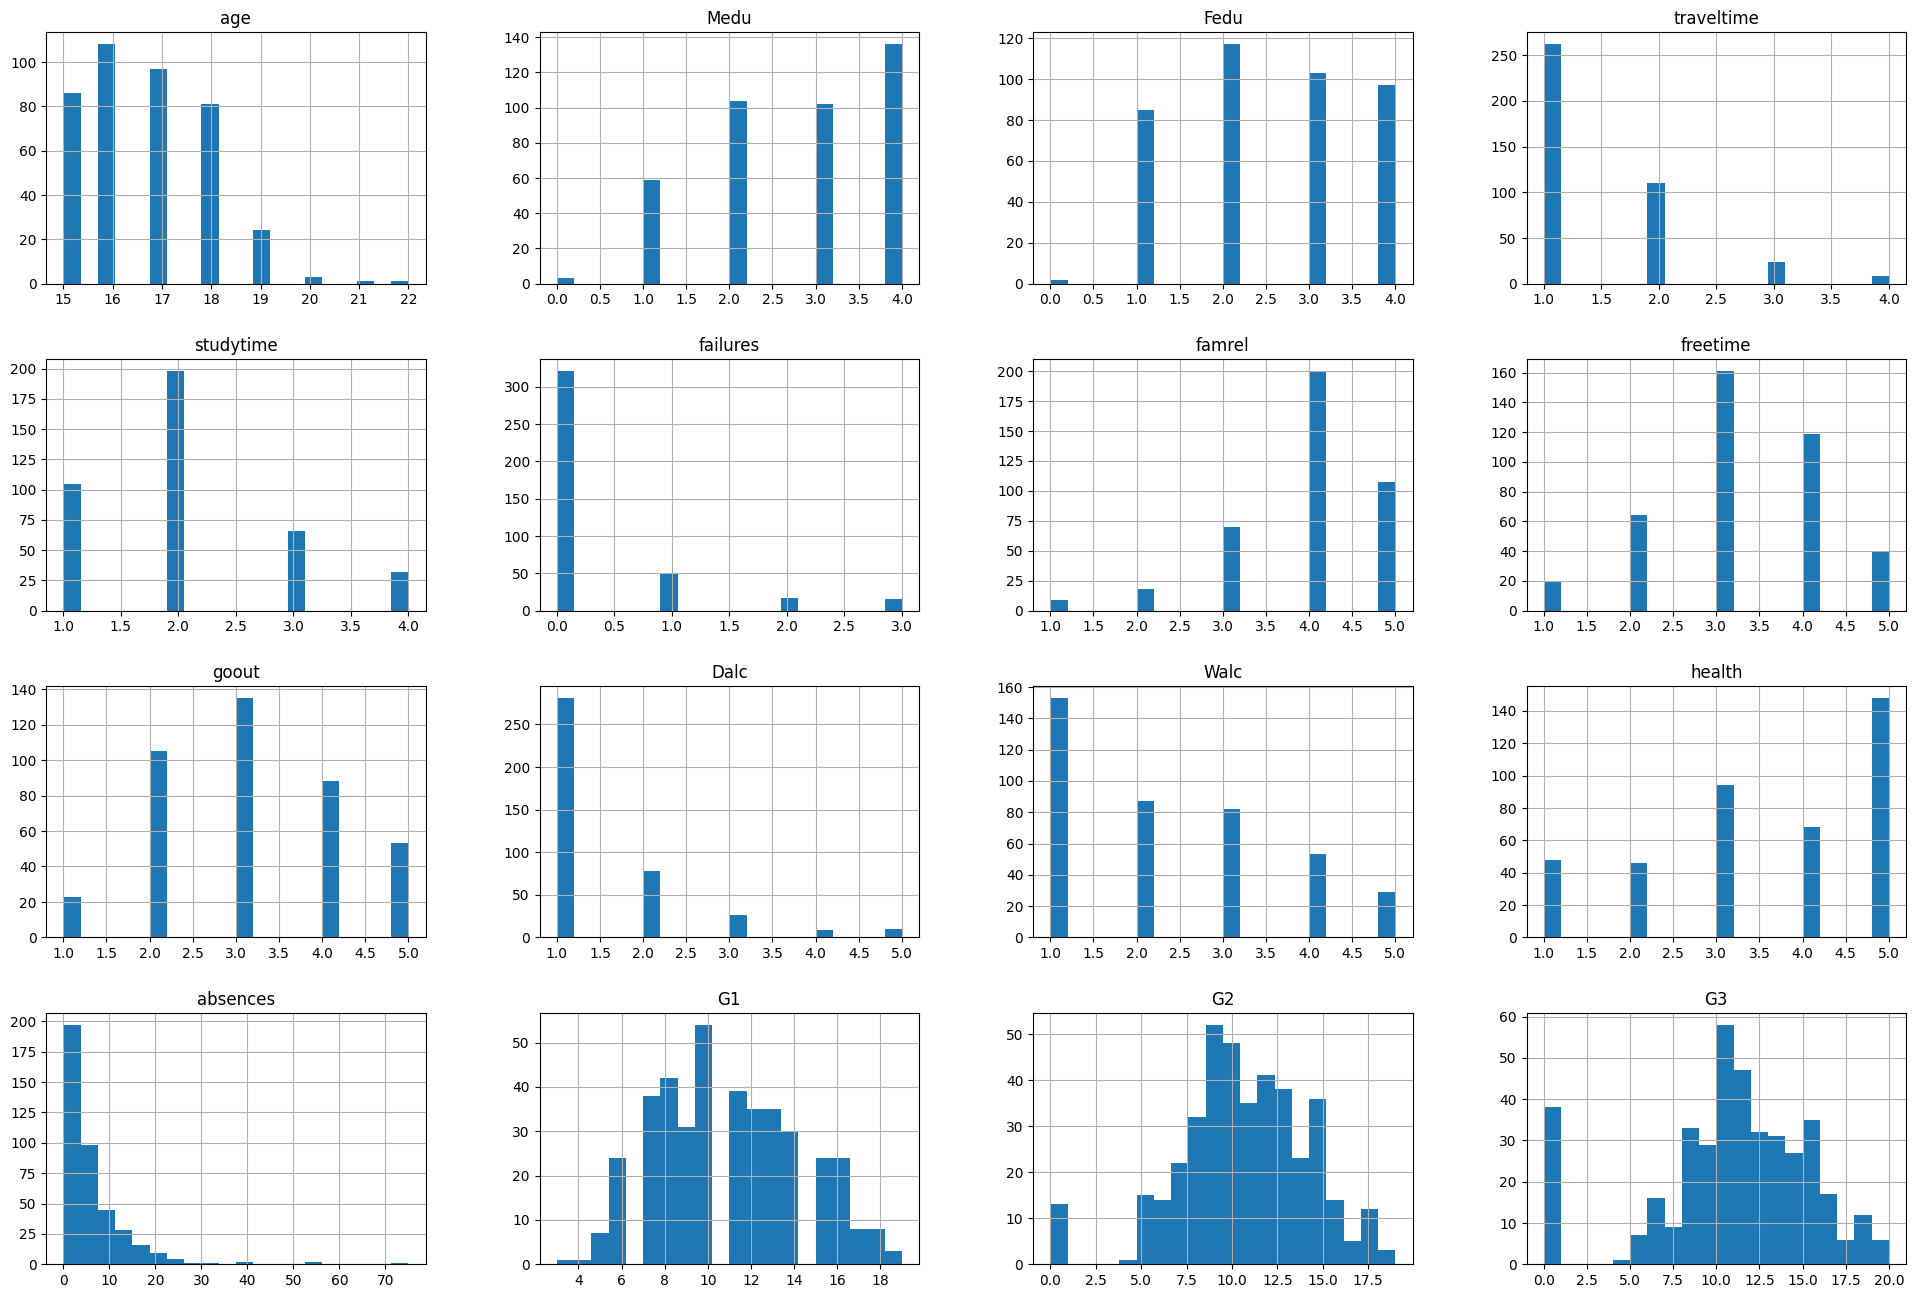

In [190]:
students.hist(bins=20, figsize=(24, 16))
plt.show()

#### Note that these attributes have very different scales. We will scale these attributes later.

## Look for correlations between the features

### 3.2 Check for correlation between attributes using sns.pairplot.

In [191]:
#Check for correlation between attributes using sns.pairplot.
sns.pairplot(students)

### 3.3 Look for correlations using pearson correlation coefficient 

In [192]:
corr_matrix = students.corr(numeric_only=True)
corr_matrix

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.182694,-0.164279,0.064501,-0.033376,0.268529,0.065006,0.018595,0.122406,0.119196,0.108774,-0.055342,0.181707,-0.064925,-0.144933,-0.160469
Medu,-0.182694,1.000000,0.615960,-0.170074,0.081952,-0.240359,-0.015390,0.039511,0.066004,0.031089,-0.037522,-0.055338,0.092515,0.207345,0.216104,0.217905
Fedu,-0.164279,0.615960,1.000000,-0.159293,-0.026656,-0.244397,-0.011660,-0.008947,0.051302,0.019182,0.000333,0.004443,0.023444,0.187513,0.159764,0.148075
traveltime,0.064501,-0.170074,-0.159293,1.000000,-0.100756,0.089485,-0.001132,-0.017118,0.021336,0.123456,0.124178,-0.000025,-0.012356,-0.077916,-0.137931,-0.104470
studytime,-0.033376,0.081952,-0.026656,-0.100756,1.000000,-0.183570,0.011807,-0.135952,-0.072478,-0.167645,-0.237188,-0.066313,-0.067296,0.161039,0.140111,0.101366
failures,0.268529,-0.240359,-0.244397,0.089485,-0.183570,1.000000,-0.039187,0.091042,0.124737,0.129471,0.136036,0.066643,0.066869,-0.352036,-0.354472,-0.359133
famrel,0.065006,-0.015390,-0.011660,-0.001132,0.011807,-0.039187,1.000000,0.149199,0.061597,-0.107809,-0.128132,0.089720,-0.040224,0.022345,-0.017561,0.051423
freetime,0.018595,0.039511,-0.008947,-0.017118,-0.135952,0.091042,0.149199,1.000000,0.283419,0.206328,0.147160,0.065992,-0.055268,0.022168,-0.007702,0.017388
goout,0.122406,0.066004,0.051302,0.021336,-0.072478,0.124737,0.061597,0.283419,1.000000,0.261770,0.419239,-0.012341,0.041895,-0.153462,-0.167945,-0.137709
Dalc,0.119196,0.031089,0.019182,0.123456,-0.167645,0.129471,-0.107809,0.206328,0.261770,1.000000,0.652199,0.068985,0.109871,-0.083446,-0.056091,-0.049158


#### Let's look at correlations with regard to our target

In [193]:
corr_matrix["G3"].sort_values(ascending=False)

G3            1.000000
G2            0.905981
G1            0.803600
Medu          0.217905
Fedu          0.148075
studytime     0.101366
famrel        0.051423
absences      0.035023
freetime      0.017388
Dalc         -0.049158
Walc         -0.051821
health       -0.066755
traveltime   -0.104470
goout        -0.137709
age          -0.160469
failures     -0.359133
Name: G3, dtype: float64

### 3.4 Plot G1 vs. G3 using sns.lineplot, and create a scatterplot for G2 and G3.

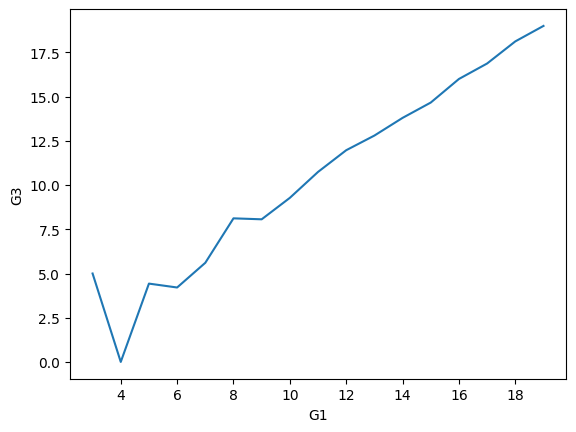

In [194]:
#plot G1 vs. G3

g = sns.lineplot(x="G1", y="G3", data=students, errorbar=None)

Text(0, 0.5, 'G3')

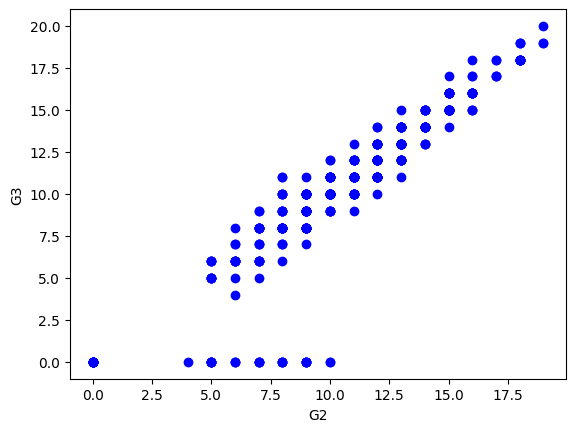

In [195]:
# Create a scatterplot of G2 and G3

X = students["G2"]
y = students["G3"]
# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, color = 'b')
plt.xlabel("G2")
plt.ylabel("G3")


# 4. Prepare the data for Machine Learning Algorithms

#### Let's start by cleaning up the data: duplicate and missing values and how to deal with them

### 4.1- Remove duplicate rows

In [196]:
# Check for duplicate rows and delete them
students.duplicated().sum()

9

In [197]:
# Remove duplicated
students.drop_duplicates(inplace=True)

### 4.2-Handle the missing values

In [199]:
# Find the number of missing values in each column

students.isna().sum()

school          0
sex             3
age             3
address         0
famsize         7
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian      262
traveltime      0
studytime       3
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences        0
G1              0
G2              0
G3              0
dtype: int64

**Note** for many online datasets, you will find missing values are replaced by "?".

You can replace the "?" with NaN first then follow the same steps
(df.values == '?').sum()
df = df.replace('?', np.nan)
df.isna().sum()

#### For the guardian feature, we will delete the whole feature

**NOTE** You can also drop columns with a specific percent of missing values, for example the below command will drop columns that has 70% (or more) missing values

    - dataset.dropna(axis='columns', thresh=int(0.7* df.shape[0]))

In [200]:
# Dropping the guardian feature

students.drop(labels=['guardian'], axis=1, inplace=True)

#### For the famsize attribute we will delete the instances with null famsize values

In [203]:
students.dropna(subset=["famsize"], inplace=True)

#### For the remaining missing values, we will fill the mean if it is a numerical value and the most frequent if it is a categorical column.

#### We will do this through creating a pipeline, that will also scale the features and perform encoding in the next step.




### 4.3. Create a pipeline that will 

1. Fill in the missing numerical values with the mean using a SimpleImputer

2. Scale the numerical columns using StandardScaler. Do not scale the target

3. Fill in the missing categorical values with the most_frequent value using SimpleImputer

4. Encode the categorical columns using OneHotEncoder


In [206]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [207]:
#create the cat and num columns
num_cols = students.select_dtypes(include='number').columns.to_list()
cat_cols = students.select_dtypes(exclude='number').columns.to_list()


#exclude the target from numerical columns
num_cols.remove("G3")

#create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

#use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

#### Display your pipeline

In [208]:
# Show the pipeline
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'Medu', 'Fedu', 'traveltime',
                                  'studytime', 'failures', 'famrel', 'freetime',
                                  'goout', 'Dalc', 'Walc', 'health', 'absences',
                                  'G1', 'G2']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['school', 'sex', 'address', 'famsize',
                                  'Pstatus', 'Mjob', 'Fjob', 'reason',
                                  'schoolsup', 'famsup', 'paid', 'activities',
                                  'nursery', 'higher', 'internet',
                                  'romantic'])])

In [209]:
# Apply the preprocessing pipeline on the dataset
students_prepared = preprocessing.fit_transform(students)

# Scikit-learn strips the column headers in most cases, so just add them back on afterward.
feature_names=preprocessing.get_feature_names_out()
students_prepared = pd.DataFrame(data=students_prepared, columns=feature_names)

students_prepared

,num__age,num__Medu,num__Fedu,num__traveltime,num__studytime,num__failures,num__famrel,num__freetime,num__goout,num__Dalc,...,cat__activities_yes,cat__nursery_no,cat__nursery_yes,cat__higher_no,cat__higher_yes,cat__internet_no,cat__internet_yes,cat__romantic_no,cat__romantic_yes,remainder__G3
0,-1.345509,1.145338,-0.480849,-0.644415,1.138131,-0.448662,-1.046318,-1.230494,-1.001491,-0.541286,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,15.0
1,-0.559278,0.227175,0.442762,-0.644415,-0.048952,-0.448662,0.065932,-0.235845,-1.001491,-0.541286,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,10.0
2,-0.559278,1.145338,0.442762,-0.644415,-0.048952,-0.448662,1.178183,0.758805,-1.001491,-0.541286,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,15.0
3,-0.559278,-0.690989,-0.480849,-0.644415,-0.048952,-0.448662,0.065932,0.758805,0.793329,-0.541286,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,11.0
4,0.226953,1.145338,1.366372,0.784346,-0.048952,-0.448662,0.065932,-2.225144,0.793329,-0.541286,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,2.585646,-0.690989,-0.480849,-0.644415,-0.048952,2.271350,1.178183,1.753454,0.793329,2.810079,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,9.0
384,0.226953,0.227175,-1.404459,0.784346,-1.236035,-0.448662,-2.158568,0.758805,1.690740,1.692958,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,16.0
385,3.371877,-1.609153,-1.404459,-0.644415,-1.236035,3.631357,1.178183,1.753454,-0.104081,1.692958,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,7.0
386,1.013184,0.227175,-0.480849,2.213106,-1.236035,-0.448662,0.065932,0.758805,-1.898902,1.692958,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,10.0


# 5. Select a model and train it

## 5.1 Split the dataset into a training dataset (80%) and testing dataset.

In [212]:
from sklearn.model_selection import train_test_split

X = students_prepared.drop(["remainder__G3"], axis=1)
y = students_prepared["remainder__G3"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(310, 55) (310,) (78, 55) (78,)


### 5.2 Train a Linear Regression model 

In [217]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train,y_train)



LinearRegression()

### Test your model on the test set, and report on the Mean Squared Error

In [214]:
# Predict the outcome of test data

lr_y_predict = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
lr_mse=mse(y_test, lr_y_predict)
lr_mse

4.143203588632437

### 5.3 Train a Linear Regression model using KFold cross-validation with 5 folds, and report on the cross validation score, use negative mean squared error as the cross validation metric.

In [218]:
from sklearn.model_selection import cross_val_score, KFold

scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

scores

array([-2.91241728, -3.80327199, -4.33055952, -5.22567454, -5.45568704])

### 5.4 Calculate the mean and standard deviation of the cross-validation scores to get an overall assessment of the model's performance:

In [219]:
mean_score = -scores.mean()  # Take the negative value to get the mean squared error

print(f'Cross-Validation Mean Score: {mean_score}')


Cross-Validation Mean Score: 4.345522073007399


**NOTE** cross_val_score in scikit-learn does allow you to use mean squared error (MSE) as a scoring metric. 

However, you should use 'neg_mean_squared_error' as the scoring parameter when you call cross_val_score. 

The reason for this naming convention is that cross_val_score follows a convention where greater values are better for scoring, while MSE is typically minimized (you want it to be as small as possible). 

To reconcile this, you use the negative MSE, which turns it into a maximizing score (higher is better).

Here's how you can use cross_val_score with negative mean squared error:

scores = cross_val_score(model, X, y, cv=5, scoring=make_scorer(mean_squared_error, greater_is_better=False))



### 5.5 Train a Linear Regression model using Ridge and Lasso regularization with alpha=1

In [177]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

RidgeRegression = Ridge(alpha=1)
ridge_model = RidgeRegression.fit(X_train, y_train)


LassoRegression = Lasso(alpha=1)
lasso_model = LassoRegression.fit(X_train, y_train)


### Test your models on the test dataset and report on the MSE

In [178]:
Ridge_y_predict = ridge_model.predict(X_test)
Lasso_y_predict = lasso_model.predict(X_test)
ridge_mse = mse(y_test, Ridge_y_predict)
lasso_mse=mse(y_test, Lasso_y_predict)

print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Lasso Regression MSE: {lasso_mse}')

Ridge Regression MSE: 4.7727991836465735
Lasso Regression MSE: 5.428927512796546


Compare the results from all the models

In [179]:
print(f'Linear Regression MSE: {lr_mse}')
print(f'Cross-Validation Mean Score: {mean_score}')
print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Lasso Regression MSE: {lasso_mse}')


Linear Regression MSE: 4.805093062229646
Cross-Validation Mean Score: 5.622036270249344
Ridge Regression MSE: 4.7727991836465735
Lasso Regression MSE: 5.428927512796546


### 5.6 Plot the prediction vs. actual for the best performing model

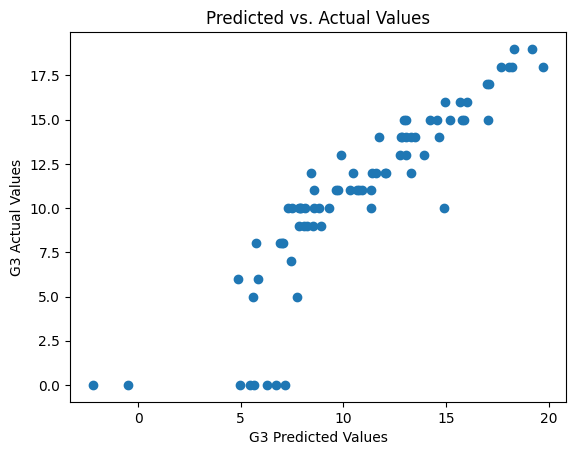

In [180]:
import matplotlib.pyplot as plt

# Assuming 'lr_model' is your best performing trained linear regression model
lr_y_predict = lr_model.predict(X_test)  # X is your feature data
plt.scatter(lr_y_predict, y_test)  # y is your actual target values
plt.xlabel("G3 Predicted Values")
plt.ylabel("G3 Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

# Markdown for Jupyter notebooks cheatsheet

Source: https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet

Here's how to format Markdown cells in Jupyter notebooks:

Headings

Use the number sign (#) followed by a blank space for notebook titles and section headings:
# for titles
## for major headings
### for subheadings
#### for 4th level subheadings

### Emphasis

Use the following code to emphasize text:

Bold text: __string__ or **string**

Italic text: _string_ or *string*


### Bullets

To create a circular bullet point, use one of the following methods. Each bullet point must be on its own line.

A hyphen (-) followed by one or two spaces, for example: - Bulleted item

A space, a hyphen (-) and a space, for example: - Bulleted item

An asterisk (*) followed by one or two spaces, for example: * Bulleted item

## Numbered lists

To create a numbered list, enter 1. followed by a space, for example:
1. Numbered item
1. Numbered item

For simplicity, you use 1. before each entry. The list will be numbered correctly when you run the cell.

